<a href="https://colab.research.google.com/github/tamires-finance/2019-CS109B/blob/master/Copy_of_credit_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix



In [6]:
df = pd.read_csv("Case.csv")
df
df.head()



,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,mau
0,41,17,12,35.9,11.90,0.504108,3.767992,0
1,30,13,8,46.7,17.88,1.352694,6.997266,0
2,40,15,14,61.8,10.64,3.438997,3.136523,0
3,41,15,14,72.0,29.67,4.165668,17.196732,0
4,57,7,37,25.6,15.86,1.498199,2.561961,0


In [7]:
df.shape

(5000, 8)

In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idade           5000 non-null   int64  
 1   experiencia     5000 non-null   int64  
 2   tempo_endereco  5000 non-null   int64  
 3   renda           5000 non-null   float64
 4   debito_renda    5000 non-null   float64
 5   cred_deb        5000 non-null   float64
 6   outros_debitos  5000 non-null   float64
 7   mau             5000 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 312.6 KB


In [8]:
df.describe()

# Estatística Descritiva
# Descrição dos dados 
# Presença de anomalias (observe o  maximo e a média em cada caso)

,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,mau
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,35.387200,8.703800,8.154000,47.676980,10.075984,1.628071,3.218582,0.251200
std,7.948403,7.194583,6.760786,51.793192,6.659336,3.053369,6.944523,0.433747
min,20.000000,0.000000,0.000000,12.100000,0.080000,0.005292,0.009373,0.000000
25%,29.000000,3.000000,3.000000,24.500000,5.050000,0.396181,0.990071,0.000000
50%,35.000000,7.000000,7.000000,34.500000,8.635000,0.906189,1.960223,0.000000
75%,41.000000,13.000000,12.000000,54.725000,13.682500,1.859147,3.789633,1.000000
max,58.000000,38.000000,37.000000,2461.700000,44.620000,139.580605,416.517425,1.000000


In [9]:
df.columns



Index(['idade', 'experiencia', 'tempo_endereco', 'renda', 'debito_renda',
       'cred_deb', 'outros_debitos', 'mau'],
      dtype='object')

In [10]:
print(df["mau"].value_counts())




0    3744
1    1256
Name: mau, dtype: int64


In [11]:
print(df["experiencia"].value_counts())



0     391
1     367
2     349
4     318
3     316
5     302
7     298
6     293
8     243
9     234
10    210
11    187
12    172
13    155
14    146
15    140
17    131
16    121
18     84
19     81
21     69
20     69
22     58
23     48
24     40
25     35
26     27
27     26
28     18
30     17
29     16
31      8
34      8
32      7
35      5
36      5
33      3
37      2
38      1
Name: experiencia, dtype: int64


In [12]:
print(df["idade"].value_counts())



33    250
31    228
32    227
36    216
29    214
28    212
30    212
37    209
34    205
35    201
26    192
39    192
38    190
41    180
40    175
27    171
43    161
42    156
25    151
44    141
24    139
45    134
46    107
23     98
47     84
48     83
49     81
22     79
50     62
21     54
51     53
52     35
54     28
53     27
55     21
20     18
56      9
57      3
58      2
Name: idade, dtype: int64


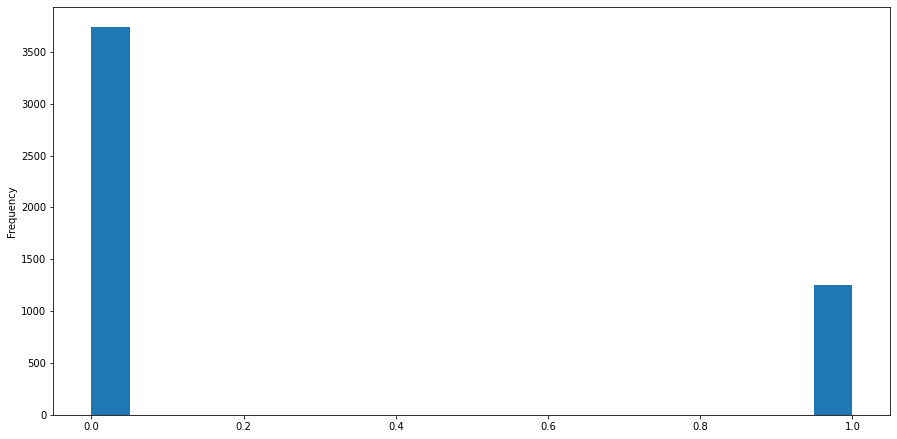

In [13]:
df["mau"].plot.hist(bins = 20,figsize=(15,7.5))

# distrição entre maus e bons pagadores 
#mau - se pagou o não o empréstimo bancário (0=pagou, 1=não pagou)
#maior número de pagantes 

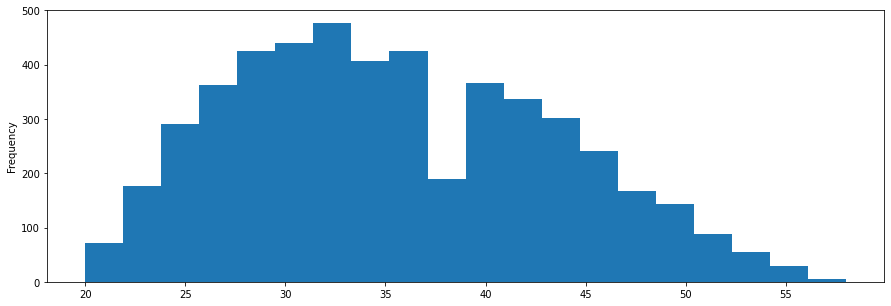

In [14]:
df["idade"].plot.hist(bins = 20,figsize=(15,5))
 
# faixa de idade com maior frequência 25-55 anos


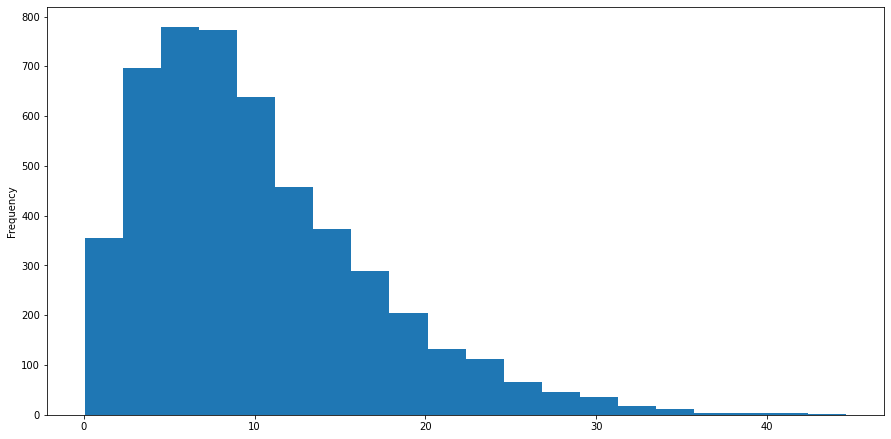

In [15]:
df["debito_renda"].plot.hist(bins = 20,figsize=(15,7.5))


#debito_renda - relação entre seus débitos (dívidas totais) e a renda anual

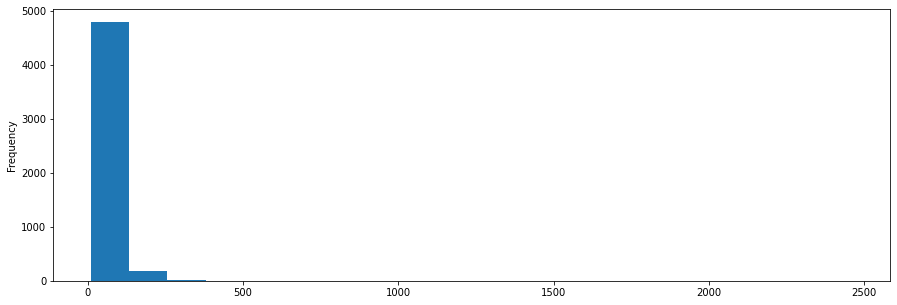

In [16]:
df["renda"].plot.hist(bins = 20,figsize=(15,5))

# maior frequência de usuários com faixa de renda entre 1000 e 4000 reais 

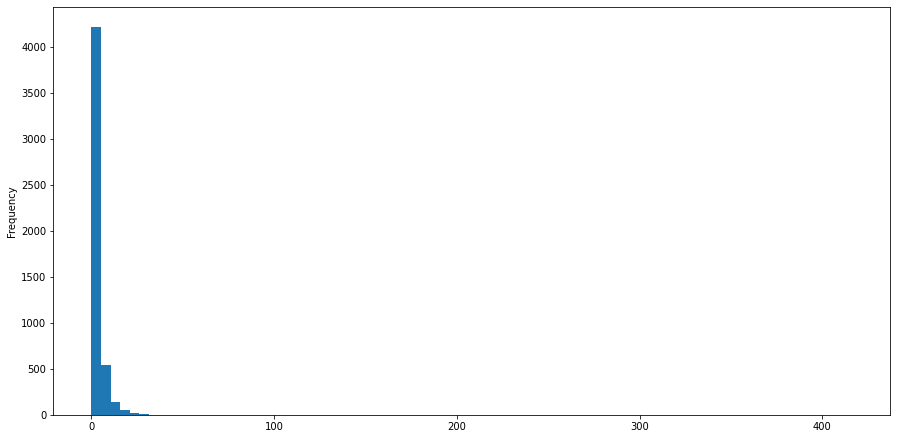

In [17]:
df["outros_debitos"].plot.hist(bins = 80,figsize=(15,7.5))

#

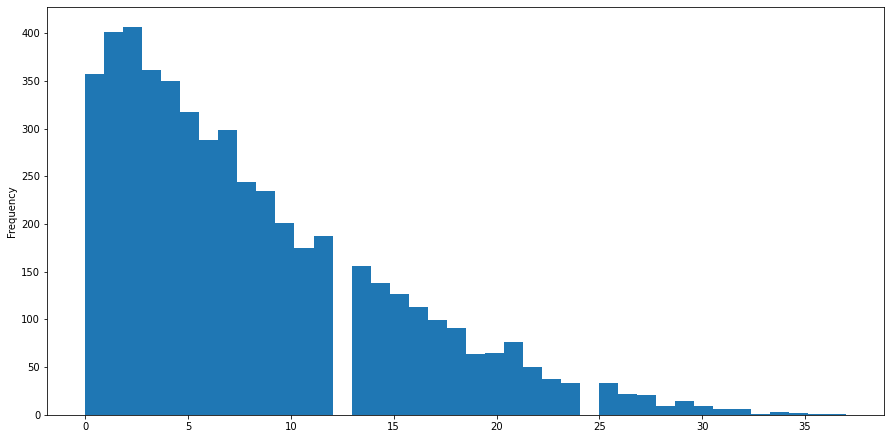

In [18]:
df["tempo_endereco"].plot.hist(bins = 40,figsize=(15,7.5))

# tempo_endereco - tempo que mora no mesmo endereço em anos
#maior número de usuários que mora no mesmo endereço há dez anos 


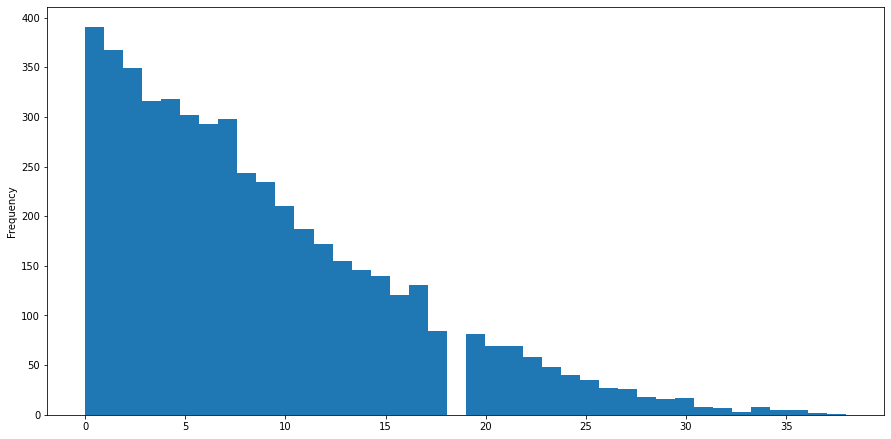

In [20]:
df["experiencia"].plot.hist(bins = 40,figsize=(15,7.5))

#experiencia - tempo de experiência em anos- frequência maior para menor tempo de experiência

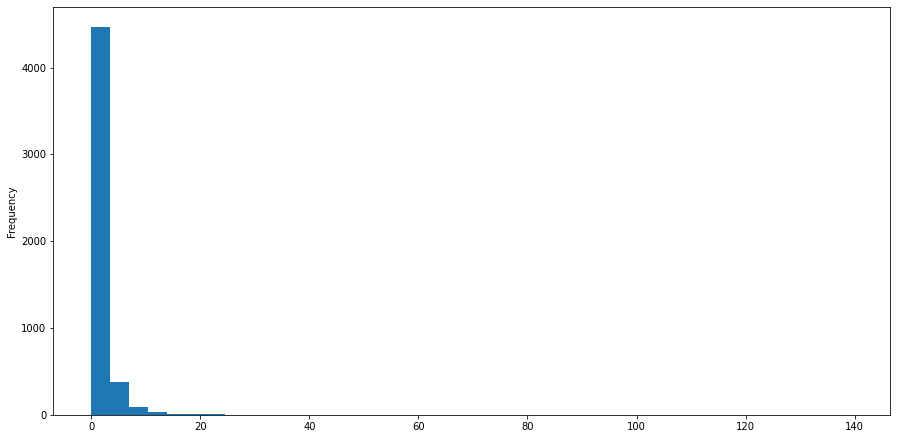

In [21]:
df["cred_deb"].value_counts()
df["cred_deb"].plot.hist(bins = 40,figsize=(15,7.5))

# cred_deb - razão entre seus créditos e débitos

In [25]:
df.isnull().sum()

# Número de casos com  Nan.

idade             0
experiencia       0
tempo_endereco    0
renda             0
debito_renda      0
cred_deb          0
outros_debitos    0
mau               0
dtype: int64

In [26]:
df.isnull().sum()

#número de casos com null

idade             0
experiencia       0
tempo_endereco    0
renda             0
debito_renda      0
cred_deb          0
outros_debitos    0
mau               0
dtype: int64

In [24]:
df.head()

,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,mau
0,41,17,12,35.9,11.90,0.504108,3.767992,0
1,30,13,8,46.7,17.88,1.352694,6.997266,0
2,40,15,14,61.8,10.64,3.438997,3.136523,0
3,41,15,14,72.0,29.67,4.165668,17.196732,0
4,57,7,37,25.6,15.86,1.498199,2.561961,0


# Aplicando os modelos aos dados

---



---


- Aplicar a Classificação básica Vamos verificar o desempenho aplicando algoritmos de Regressão Logística e Árvore de Decisão.
- Antes de aplicar os algoritmos, os dados são divididos em conjuntos de treinamento e teste na proporção 2: 1 que são dados de teste 33% e dados de treinamento 67%
- 

In [81]:
# importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


x_basic = df
y = df["mau"]

# Spliting the data into test and train sets
x_basic_tr,x_basic_te,y_tr,y_te = train_test_split(x_basic,y,test_size =.33,random_state=1)
logreg_basic = LogisticRegression()

# Training the basic logistic regression model with training set 
logreg_basic.fit(x_basic_tr,y_tr)

# Printing the coefficients
print("intercept ")
print(logreg_basic.intercept_)
print("")
print("coefficients ")
print(logreg_basic.coef_)

# Predicting the output of the test cases using the algorithm created above
y_pre = logreg_basic.predict(x_basic_te)

# Validating the algorithm using various Performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("")
a1 = accuracy_score(y_te,y_pre)
f1 = f1_score(y_te, y_pre, average="macro")
p1 = precision_score(y_te, y_pre, average="macro")
r1 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

intercept 
[-5.14]

coefficients 
[[-1.82e-03 -9.61e-02 -5.20e-02 -1.31e-03  5.31e-02  2.12e-01  9.52e-03
   9.48e+00]]

accuracy score :  1.0
f1 score :  1.0
precision score :  1.0
recall score :  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1023  204]
 [ 234  189]]


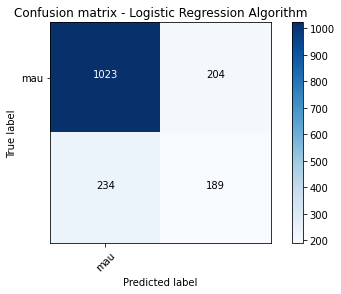

In [63]:


cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
                      title='Confusion matrix - Logistic Regression Algorithm')

plt.show()

accuracy score :  1.0
f1 score :  1.0
precision score :  1.0
recall score :  1.0
Confusion matrix, without normalization
[[1227    0]
 [   0  423]]


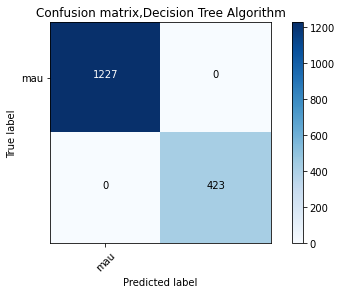

In [82]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 100
 
dectree_basic.fit(x_basic_tr,y_tr)


y_pre = dectree_basic.predict(x_basic_te)



a2 = accuracy_score(y_te,y_pre)
f2 = f1_score(y_te, y_pre, average="macro")
p2 = precision_score(y_te, y_pre, average="macro")
r2 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=7)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
                      title='Confusion matrix,Decision Tree Algorithm')

plt.show()

### Usando correlação de  Pearson para seleção de variável 

In [66]:
# Achando a relação entre todas variáveis e mau

df.corr(method='pearson')

,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,mau
idade,1.000000,0.559011,0.580612,0.400467,-0.019714,0.222039,0.202564,-0.184532
experiencia,0.559011,1.000000,0.328398,0.511006,-0.016297,0.286104,0.250384,-0.258780
tempo_endereco,0.580612,0.328398,1.000000,0.211169,-0.017647,0.103693,0.093347,-0.209655
renda,0.400467,0.511006,0.211169,1.000000,0.012391,0.741948,0.816931,-0.041060
debito_renda,-0.019714,-0.016297,-0.017647,0.012391,1.000000,0.366540,0.310966,0.379351
cred_deb,0.222039,0.286104,0.103693,0.741948,0.366540,1.000000,0.773914,0.186907
outros_debitos,0.202564,0.250384,0.093347,0.816931,0.310966,0.773914,1.000000,0.080372
mau,-0.184532,-0.258780,-0.209655,-0.041060,0.379351,0.186907,0.080372,1.000000


In [68]:


feat1=["debito_renda","cred_deb","outros_debitos"]


##### Agora que obtivemos os recursos com alta correlação com o recurso BAD, vamos executar os algoritmos de classificação e compará-los

accuracy score :  0.78
f1 score :  0.6345233976418384
precision score :  0.7281861448968799
recall score :  0.619717699283844
Confusion matrix, without normalization
[[1164   63]
 [ 300  123]]


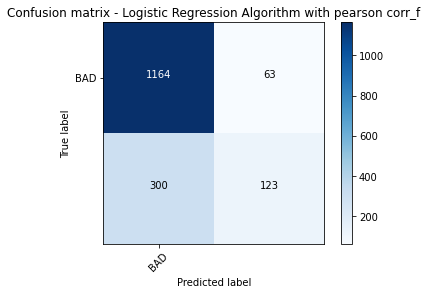

In [70]:
# Regressão Logística

x = df[feat1]
y = df["mau"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
a3 = accuracy_score(y_te,y_pre)
f3 = f1_score(y_te, y_pre, average="macro")
p3 = precision_score(y_te, y_pre, average="macro")
r3 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a3)
print("f1 score : ",f3)
print("precision score : ",p3)
print("recall score : ",r3)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Logistic Regression Algorithm with pearson corr_f')

plt.show()

accuracy score :  0.7351515151515151
f1 score :  0.6451419063269124
precision score :  0.6486576289207868
recall score :  0.642231239198414

Confusion matrix, without normalization
[[1022  205]
 [ 232  191]]


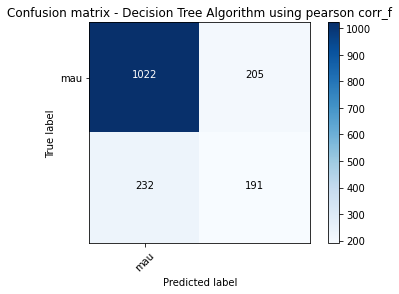

In [84]:
# Decision Tree classifier usando feat1

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a4 = accuracy_score(y_te,y_pre)
f4 = f1_score(y_te, y_pre, average="macro")
p4 = precision_score(y_te, y_pre, average="macro")
r4 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a4)
print("f1 score : ",f4)
print("precision score : ",p4)
print("recall score : ",r4)
print("")
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
title='Confusion matrix - Decision Tree Algorithm using pearson corr_f')

plt.show()

In [72]:
# Encontrando as melhores variáveis usando chi-squared

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
df_new = pd.DataFrame(SelectKBest(chi2, k=7).fit_transform(df.drop(["mau"],axis = 1),df["mau"]))

In [73]:
# dataframe containing the selected features

df_new.head()

,0,1,2,3,4,5,6
0,41.0,17.0,12.0,35.9,11.90,0.504108,3.767992
1,30.0,13.0,8.0,46.7,17.88,1.352694,6.997266
2,40.0,15.0,14.0,61.8,10.64,3.438997,3.136523
3,41.0,15.0,14.0,72.0,29.67,4.165668,17.196732
4,57.0,7.0,37.0,25.6,15.86,1.498199,2.561961


accuracy score :  0.8090909090909091
f1 score :  0.7204832158170736
precision score :  0.7592430801000754
recall score :  0.7012404122376552
Confusion matrix, without normalization
[[1132   95]
 [ 220  203]]


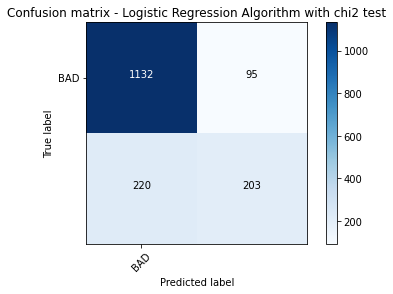

In [74]:
# RODANDO regressão logística após o teste chi2 

x = df_new
y = df["mau"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
y_pre = logreg.predict(x_te)
a5 = accuracy_score(y_te,y_pre)
f5 = f1_score(y_te, y_pre, average="macro")
p5 = precision_score(y_te, y_pre, average="macro")
r5 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a5)
print("f1 score : ",f5)
print("precision score : ",p5)
print("recall score : ",r5)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
 title='Confusion matrix - Logistic Regression Algorithm with chi2 test')

plt.show()


accuracy score :  0.7284848484848485
f1 score :  0.6428357450295608
precision score :  0.6432882438361422
recall score :  0.6423959724173011
Confusion matrix, without normalization
[[1005  222]
 [ 226  197]]


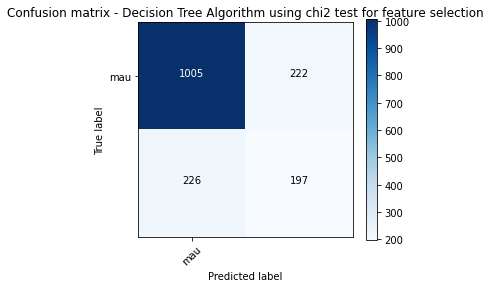

In [76]:
# Decision Tree classifier usando  variáveis do teste  chi2 

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a6 = accuracy_score(y_te,y_pre)
f6 = f1_score(y_te, y_pre, average="macro")
p6 = precision_score(y_te, y_pre, average="macro")
r6 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a6)
print("f1 score : ",f6)
print("precision score : ",p6)
print("recall score : ",r6)
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
title='Confusion matrix - Decision Tree Algorithm using chi2 test for feature selection')

plt.show()

In [60]:
df.head()

,idade,experiencia,tempo_endereco,renda,debito_renda,cred_deb,outros_debitos,mau
0,41,17,12,35.9,11.90,0.504108,3.767992,0
1,30,13,8,46.7,17.88,1.352694,6.997266,0
2,40,15,14,61.8,10.64,3.438997,3.136523,0
3,41,15,14,72.0,29.67,4.165668,17.196732,0
4,57,7,37,25.6,15.86,1.498199,2.561961,0


### Usando f_classif para seleção de variável

In [77]:
from sklearn.feature_selection import f_classif

df_new2 = pd.DataFrame(SelectKBest(f_classif, k=7).fit_transform(df.drop(["mau"],axis=1),df["mau"]))
df_new2.head()

,0,1,2,3,4,5,6
0,41.0,17.0,12.0,35.9,11.90,0.504108,3.767992
1,30.0,13.0,8.0,46.7,17.88,1.352694,6.997266
2,40.0,15.0,14.0,61.8,10.64,3.438997,3.136523
3,41.0,15.0,14.0,72.0,29.67,4.165668,17.196732
4,57.0,7.0,37.0,25.6,15.86,1.498199,2.561961


accuracy score :  0.8090909090909091
f1 score :  0.7204832158170736
precision score :  0.7592430801000754
recall score :  0.7012404122376552
Confusion matrix, without normalization
[[1132   95]
 [ 220  203]]


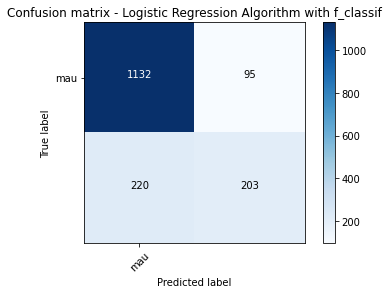

In [83]:
# Running the logistic regression algorithm using the features selected from f_classif test

x = df_new2
y = df["mau"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
a7 = accuracy_score(y_te,y_pre)
f7 = f1_score(y_te, y_pre, average="macro")
p7 = precision_score(y_te, y_pre, average="macro")
r7 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a7)
print("f1 score : ",f7)
print("precision score : ",p7)
print("recall score : ",r7)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
title='Confusion matrix - Logistic Regression Algorithm with f_classif')

plt.show()

accuracy score :  0.730909090909091
f1 score :  0.6397521636506688
precision score :  0.6430008784961433
recall score :  0.637055148057593
Confusion matrix, without normalization
[[1018  209]
 [ 235  188]]


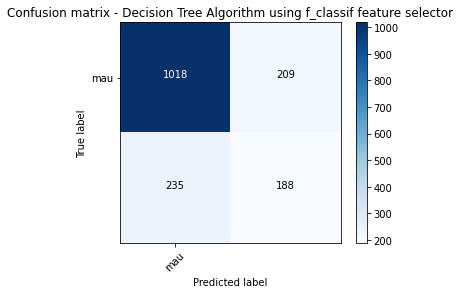

In [79]:
# Decision Tree classifier usando variáveis do teste  f_classif

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a8 = accuracy_score(y_te,y_pre)
f8 = f1_score(y_te, y_pre, average="macro")
p8 = precision_score(y_te, y_pre, average="macro")
r8 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a8)
print("f1 score : ",f8)
print("precision score : ",p8)
print("recall score : ",r8)
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mau"],
                      title='Confusion matrix - Decision Tree Algorithm using f_classif feature selector')

plt.show()

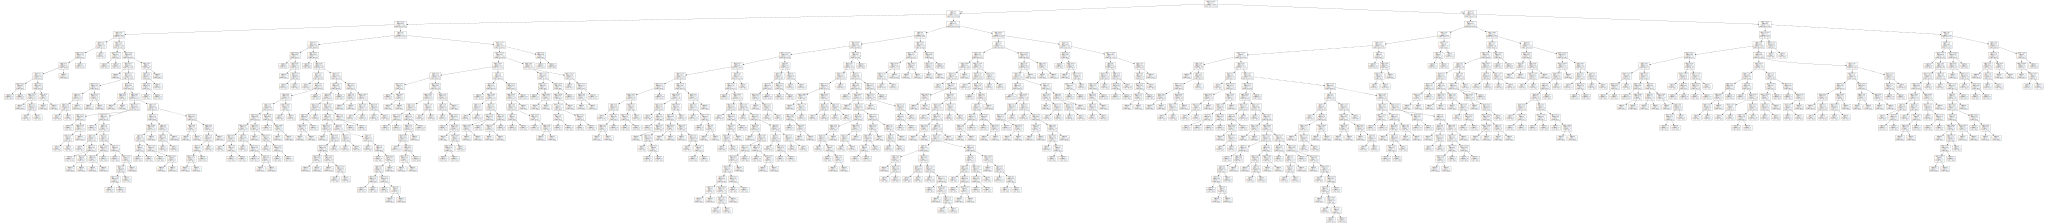

In [43]:
from sklearn import tree
import graphviz 
dot_dat = tree.export_graphviz(clf_tree, out_file=None) 
graph = graphviz.Source(dot_dat) 
graph

### Usando f_regression for seleção de variável

In [44]:
from sklearn.feature_selection import f_regression

df_new3 = pd.DataFrame(SelectKBest(f_regression, k=7).fit_transform(df.drop(["mau"],axis=1),df["mau"]))
df_new3.head()

,0,1,2,3,4,5,6
0,41.0,17.0,12.0,35.9,11.90,0.504108,3.767992
1,30.0,13.0,8.0,46.7,17.88,1.352694,6.997266
2,40.0,15.0,14.0,61.8,10.64,3.438997,3.136523
3,41.0,15.0,14.0,72.0,29.67,4.165668,17.196732
4,57.0,7.0,37.0,25.6,15.86,1.498199,2.561961


accuracy score :  0.8090909090909091
f1 score :  0.7204832158170736
precision score :  0.7592430801000754
recall score :  0.7012404122376552
Confusion matrix, without normalization
[[1014  213]
 [ 231  192]]


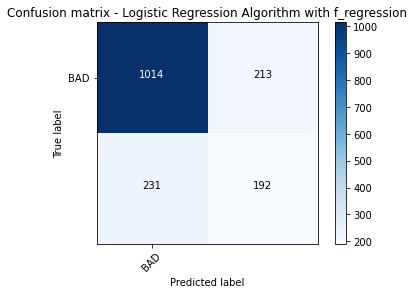

In [45]:
# Running the logistic regression algorithm using the features selected from f_regression test

x = df_new3
y = df["mau"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre2 = logreg.predict(x_te)
a9 = accuracy_score(y_te,y_pre2)
f9 = f1_score(y_te, y_pre2, average="macro")
p9 = precision_score(y_te, y_pre2, average="macro")
r9 = recall_score(y_te, y_pre2, average="macro")
print("accuracy score : ",a9)
print("f1 score : ",f9)
print("precision score : ",p9)
print("recall score : ",r9)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Logistic Regression Algorithm with f_regression')

plt.show()

accuracy score :  0.743030303030303
f1 score :  0.658748353738842
precision score :  0.6608901741645105
recall score :  0.6568231343240447
Confusion matrix, without normalization
[[1023  204]
 [ 220  203]]


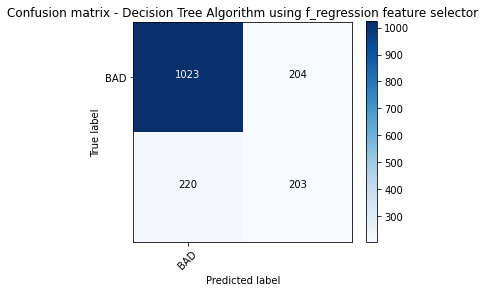

In [46]:
# Decision Tree classifier usando f_regression test

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a10 = accuracy_score(y_te,y_pre)
f10 = f1_score(y_te, y_pre, average="macro")
p10= precision_score(y_te, y_pre, average="macro")
r10 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a10)
print("f1 score : ",f10)
print("precision score : ",p10)
print("recall score : ",r10)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"], 
                      title='Confusion matrix - Decision Tree Algorithm using f_regression feature selector')

plt.show()

# Comparando modelos 
 - Escolher o melhor modelo para nosso problema 

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree'],
    'Feature Selection Method' : ['None','None','Pearson corr_fact','Pearson corr_fact','chi2 test','chi2 test','f_classif','f_classif','f_regression','f_regression'],
    'Accuracy Score': [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10],
    'Recall Score' : [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10],
    'F1 Score' : [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10],
    'Precision Score' : [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
})

In [ ]:
models

,Model,Feature Selection Method,Accuracy Score,Recall Score,F1 Score,Precision Score
0,Logistic Regression,None,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,None,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression,Pearson corr_fact,0.780000,0.619718,0.634523,0.728186
3,Decision Tree,Pearson corr_fact,0.684848,0.584398,0.584785,0.585196
4,Logistic Regression,chi2 test,0.809091,0.701240,0.720483,0.759243
5,Decision Tree,chi2 test,0.733333,0.646430,0.647556,0.648764
6,Logistic Regression,f_classif,0.809091,0.701240,0.720483,0.759243
7,Decision Tree,f_classif,0.738788,0.647000,0.650014,0.653642
8,Logistic Regression,f_regression,0.809091,0.701240,0.720483,0.759243
9,Decision Tree,f_regression,0.727879,0.639665,0.640631,0.641662


In [ ]:
pd.pivot_table(models,index = ["Feature Selection Method","Model"])

Accuracy Score  F1 Score  \
Feature Selection Method Model                                           
None                     Decision Tree              1.000000  1.000000   
                         Logistic Regression        1.000000  1.000000   
Pearson corr_fact        Decision Tree              0.684848  0.584785   
                         Logistic Regression        0.780000  0.634523   
chi2 test                Decision Tree              0.733333  0.647556   
                         Logistic Regression        0.809091  0.720483   
f_classif                Decision Tree              0.738788  0.650014   
                         Logistic Regression        0.809091  0.720483   
f_regression             Decision Tree              0.727879  0.640631   
                         Logistic Regression        0.809091  0.720483   

                                              Precision Score  Recall Score  
Feature Selection Method Model                                               
None                     Decision Tree               1.000000      1.000000  
                         Logistic Regression         1.000000      1.000000  
Pearson corr_fact        Decision Tree               0.585196      0.584398  
                         Logistic Regression         0.728186      0.619718  
chi2 test                Decision Tree               0.648764      0.646430  
                         Logistic Regression         0.759243      0.701240  
f_classif                Decision Tree               0.653642      0.647000  
                         Logistic Regression         0.759243      0.701240  
f_regression             Decision Tree               0.641662      0.639665  
                         Logistic Regression         0.759243      0.701240


- maior recall é utilizando o f-classif na regressão logística e chi2- melhor método a ser utilizado.
- O limite é definido por padrão como 0,5 na regressão logística!

- Obviamente, alterar o limite afeta o desempenho do modelo e isso pode ser observado na próxima seção.

- Isso pode ser estendido ainda mais pela reamostragem dos dados para aumentar a pontuação RECALL

# Mudando o threshold para observar peformance

Recall metric in the testing dataset:  0.9385342789598109
Accuracy score for the testing dataset:  0.5872727272727273
Confusion matrix, without normalization
[[572 655]
 [ 26 397]]

Recall metric in the testing dataset:  0.8274231678486997
Accuracy score for the testing dataset:  0.693939393939394
Confusion matrix, without normalization
[[795 432]
 [ 73 350]]

Recall metric in the testing dataset:  0.7281323877068558
Accuracy score for the testing dataset:  0.7721212121212121
Confusion matrix, without normalization
[[966 261]
 [115 308]]

Recall metric in the testing dataset:  0.5981087470449172
Accuracy score for the testing dataset:  0.7915151515151515
Confusion matrix, without normalization
[[1053  174]
 [ 170  253]]

Recall metric in the testing dataset:  0.4799054373522459
Accuracy score for the testing dataset:  0.8090909090909091
Confusion matrix, without normalization
[[1132   95]
 [ 220  203]]

Recall metric in the testing dataset:  0.35933806146572106
Accuracy score for the t

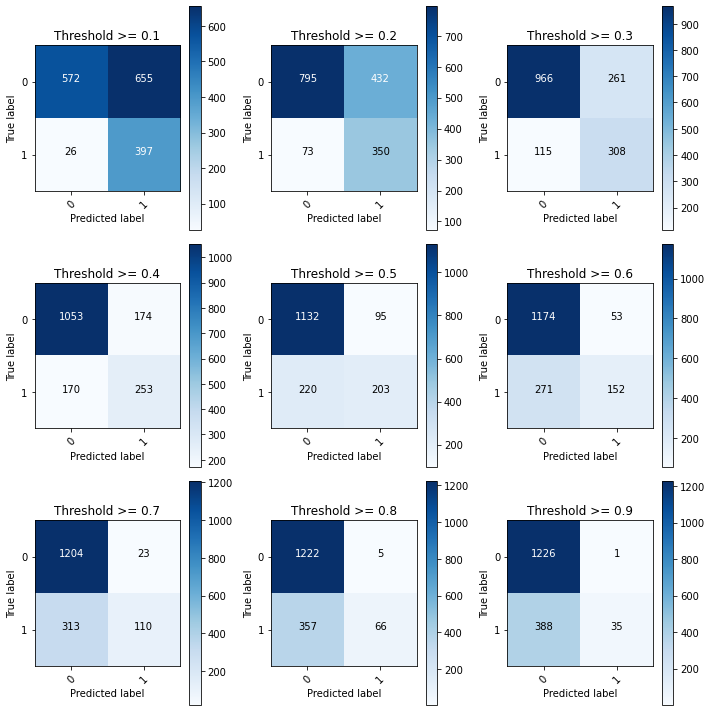

In [80]:
lr = LogisticRegression()
lr.fit(x_tr,y_tr)
y_pred_proba = lr.predict_proba(x_te)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] >= i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_te,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    rec1 = recall_score(y_te, y_test_predictions_high_recall)
    acc= 1.0*(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[0,1])
    print("Recall metric in the testing dataset: ",rec1)
    print("Accuracy score for the testing dataset: ",acc)
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)
    print("")



- Os valores de recall e precisão variam com o limite (threshold) selecionado.
- è possível selecionar o threshold de acordo com a precisão requerida;


------------------------------------------------------------------------------------------------------------------------------